# ARUCO markers: basics

## 1:  Marker creation

In [13]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

In [14]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("data/markers.pdf")    
plt.show()

<IPython.core.display.Javascript object>

## 2: Print, cut, stick and take a picture

In [15]:
frame = cv2.imread("data/marqueurs_chaise.png")
plt.figure()
plt.imshow(frame)
plt.show()

<IPython.core.display.Javascript object>

## 3: Post processing

In [16]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


CPU times: user 6.37 ms, sys: 1.8 ms, total: 8.17 ms
Wall time: 3.08 ms


In [17]:
rejectedImgPoints[1]

array([[[752., 481.],
        [742., 482.],
        [736., 481.],
        [748., 480.]]], dtype=float32)

In [18]:
corners

(array([[[424., 179.],
         [469., 181.],
         [469., 224.],
         [426., 222.]]], dtype=float32),
 array([[[ 31., 179.],
         [ 77., 181.],
         [ 81., 226.],
         [ 36., 224.]]], dtype=float32),
 array([[[801., 170.],
         [843., 170.],
         [841., 214.],
         [796., 213.]]], dtype=float32))

Pretty fast processing !

## 4: Results

In [19]:
plt.figure()
plt.imshow(frame_markers, origin = "upper")
if ids is not None:
    for i in range(len(ids)):
        c = corners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "+", label = "id={0}".format(ids[i]))
"""for points in rejectedImgPoints:
    y = points[:, 0]
    x = points[:, 1]
    plt.plot(x, y, ".m-", linewidth = 1.)"""
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [20]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1     c2     c3     c4     m1     m2     m3     m4       o
marker                                                                  
3      x  424.0  469.0  469.0  426.0  446.5  469.0  447.5  425.0  447.00
       y  179.0  181.0  224.0  222.0  180.0  202.5  223.0  200.5  201.50
8      x   31.0   77.0   81.0   36.0   54.0   79.0   58.5   33.5   56.25
       y  179.0  181.0  226.0  224.0  180.0  203.5  225.0  201.5  202.50
9      x  801.0  843.0  841.0  796.0  822.0  842.0  818.5  798.5  820.25
       y  170.0  170.0  214.0  213.0  170.0  192.0  213.5  191.5  191.75

In [21]:
# Plante un peu...
"""cap = cv2.VideoCapture('_data/AeroTrain.mp4')
while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()"""

"cap = cv2.VideoCapture('_data/AeroTrain.mp4')\nwhile(cap.isOpened()):\n    ret, frame = cap.read()\n\n    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)\n\n    cv2.imshow('frame',gray)\n    if cv2.waitKey(1) & 0xFF == ord('q'):\n        break\n\ncap.release()\ncv2.destroyAllWindows()"

In [22]:
cap = cv2.VideoCapture('_data/AeroTrain.mp4')
nframe = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print("nframe =", nframe)
cap.set(1, 300) # arguments: 1: laisser, 2: numéro du frame
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray)
plt.show()
cap.release()

nframe = 0


OpenCV: Couldn't read video stream from file "_data/AeroTrain.mp4"


error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

Wall time: 31.3 ms


<IPython.core.display.Javascript object>


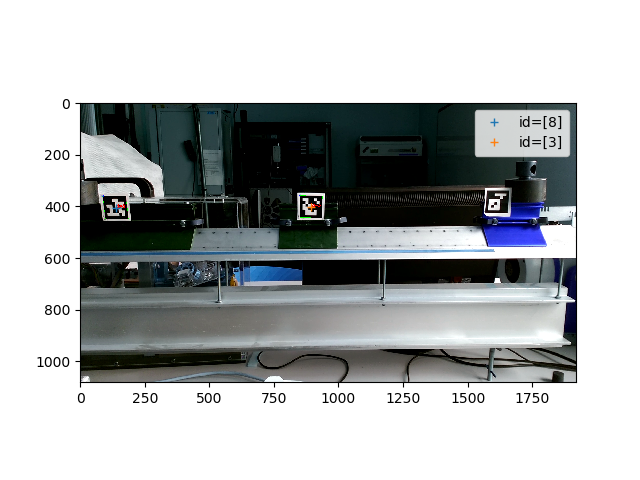

In [ ]:
plt.figure()
plt.imshow(frame_markers, origin = "upper")
if ids is not None:
    for i in range(len(ids)):
        c = corners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "+", label = "id={0}".format(ids[i]))
"""for points in rejectedImgPoints:
    y = points[:, 0]
    x = points[:, 1]
    plt.plot(x, y, ".m-", linewidth = 1.)"""
plt.legend()
plt.show()

In [ ]:
help(aruco.DetectorParameters_create)

Help on built-in function DetectorParameters_create:

DetectorParameters_create(...)
    DetectorParameters_create() -> retval
    .

